In [2]:
import sys
sys.path.append('/home/zhangy/python_project/mms')
from alpa_serve.profiling import ProfilingDatabase

prof_database = ProfilingDatabase("/home/zhangy/python_project/mms/alpa_serve/profiling_result.pkl")

In [3]:
# 查看prof_database类型
print(type(prof_database.results))

<class 'dict'>


In [4]:
for model_name, model_result in prof_database.results.items():
    print(model_name)
    # print(model_result)

bert-1.3b
bert-2.6b
bert-6.7b
moe-1.3b
moe-2.4b
moe-7.1b
moe-5.3b


In [15]:
# 复制字典的键到一个列表中
model_names = list(prof_database.results.keys())

for model_name in model_names:
    model_result = prof_database.results[model_name]
    for c in ["a", "b", "c", "d", "e", "f", "g", "h", "i"]:
        new_model_name = model_name + "-" + c
        model_result.model_name = new_model_name
        prof_database.update(model_result)

In [16]:
print(prof_database.results.keys())
print(len(list(prof_database.results.keys())))

dict_keys(['bert-1.3b', 'bert-2.6b', 'bert-6.7b', 'moe-1.3b', 'moe-2.4b', 'moe-7.1b', 'moe-5.3b', 'bert-1.3b-a', 'bert-1.3b-b', 'bert-1.3b-c', 'bert-1.3b-d', 'bert-1.3b-e', 'bert-1.3b-f', 'bert-1.3b-g', 'bert-1.3b-h', 'bert-1.3b-i', 'bert-2.6b-a', 'bert-2.6b-b', 'bert-2.6b-c', 'bert-2.6b-d', 'bert-2.6b-e', 'bert-2.6b-f', 'bert-2.6b-g', 'bert-2.6b-h', 'bert-2.6b-i', 'bert-6.7b-a', 'bert-6.7b-b', 'bert-6.7b-c', 'bert-6.7b-d', 'bert-6.7b-e', 'bert-6.7b-f', 'bert-6.7b-g', 'bert-6.7b-h', 'bert-6.7b-i', 'moe-1.3b-a', 'moe-1.3b-b', 'moe-1.3b-c', 'moe-1.3b-d', 'moe-1.3b-e', 'moe-1.3b-f', 'moe-1.3b-g', 'moe-1.3b-h', 'moe-1.3b-i', 'moe-2.4b-a', 'moe-2.4b-b', 'moe-2.4b-c', 'moe-2.4b-d', 'moe-2.4b-e', 'moe-2.4b-f', 'moe-2.4b-g', 'moe-2.4b-h', 'moe-2.4b-i', 'moe-7.1b-a', 'moe-7.1b-b', 'moe-7.1b-c', 'moe-7.1b-d', 'moe-7.1b-e', 'moe-7.1b-f', 'moe-7.1b-g', 'moe-7.1b-h', 'moe-7.1b-i', 'moe-5.3b-a', 'moe-5.3b-b', 'moe-5.3b-c', 'moe-5.3b-d', 'moe-5.3b-e', 'moe-5.3b-f', 'moe-5.3b-g', 'moe-5.3b-h', 'moe-5.

In [17]:
# 将prof_database保存为pkl文件
prof_database.database_filename = "/home/zhangy/python_project/mms/alpa_serve/syn_profiling_result.pkl"
prof_database.materialize()
# import pickle
# with open("/home/zhangy/python_project/mms/alpa_serve/syn_profiling_result.pkl", "wb") as f:
#     pickle.dump(prof_database, f)

In [42]:
import sys
sys.path.append('/home/zhangy/python_project/mms')
from alpa_serve.profiling import ProfilingDatabase
syn_prof_database = ProfilingDatabase("/home/zhangy/python_project/mms/alpa_serve/syn_profiling_result.pkl")

In [43]:
# 查看prof_database类型
print(type(syn_prof_database.results))

<class 'dict'>


In [44]:
for model_name, model_result in syn_prof_database.results.items():
    print(model_name)
    print(model_result)

bert-1.3b
ProfilingResult(model_name='bert-1.3b-i', para_dict={ParallelConfig(dp=1, op=8, pp=1): LatencyMemData(latency={1: [0.04343467288547092]}, act_mem={1: [110194432.0]}, weight_mem=[355377664.0], metadata={'compilation_times': {'stage-construction': 56.877827167510986, 'stage-construction-dp': 1.1626574993133545, 'stage-construction-compilation': 20.754591941833496, 'stage-construction-profiling': 31.413212299346924}, 'compute_cost_file_name': None, 'forward_stage_layer_ids': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]], 'submesh_shapes': [(1, 8)], 'logical_mesh_shapes': [(1, 8)], 'autosharding_option_dicts': [{'force_batch_dim_to_mesh_dim': 0}]}), ParallelConfig(dp=1, op=4, pp=2): LatencyMemData(latency={1: [0.0309603214263916, 0.02707256211174859]}, act_mem={1: [220263168.0, 214030592.0]}, weight_mem=[355332096.0, 1191813120.0], met

In [45]:
# 查看bert-1.3b中para_dict的每种ParallelConfig的性能
model_result = syn_prof_database.results["bert-6.7b"]
model_result.para_dict

{ParallelConfig(dp=1, op=8, pp=1): LatencyMemData(latency={1: [0.09923611746893989]}, act_mem={1: [119634688.0]}, weight_mem=[1717826048.0], metadata={'compilation_times': {'stage-construction': 57.71984839439392, 'stage-construction-dp': 1.1103794574737549, 'stage-construction-compilation': 19.98506188392639, 'stage-construction-profiling': 31.01198101043701}, 'compute_cost_file_name': None, 'forward_stage_layer_ids': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]], 'submesh_shapes': [(1, 8)], 'logical_mesh_shapes': [(1, 8)], 'autosharding_option_dicts': [{'force_batch_dim_to_mesh_dim': 0}]}),
 ParallelConfig(dp=1, op=4, pp=2): LatencyMemData(latency={1: [0.07650698555840386, 0.06480603747897679]}, act_mem={1: [239139072.0, 226616064.0]}, weight_mem=[1717551104.0, 5655433216.0], 

ParallelConfig(dp=1, op=8, pp=1) 0.09923611746893989
ParallelConfig(dp=1, op=4, pp=2) 0.14131302303738064
ParallelConfig(dp=1, op=2, pp=4) 0.26575756072998047
ParallelConfig(dp=1, op=1, pp=8) 0.4047500027550591
ParallelConfig(dp=1, op=4, pp=1) 0.15254786279466417
ParallelConfig(dp=1, op=2, pp=2) 0.24810589684380427
ParallelConfig(dp=1, op=1, pp=4) 0.3987043963538276
ParallelConfig(dp=1, op=2, pp=1) 0.26244131724039715
ParallelConfig(dp=1, op=1, pp=2) 0.3958052529229058
ParallelConfig(dp=1, op=1, pp=1) 0.3950637976328532


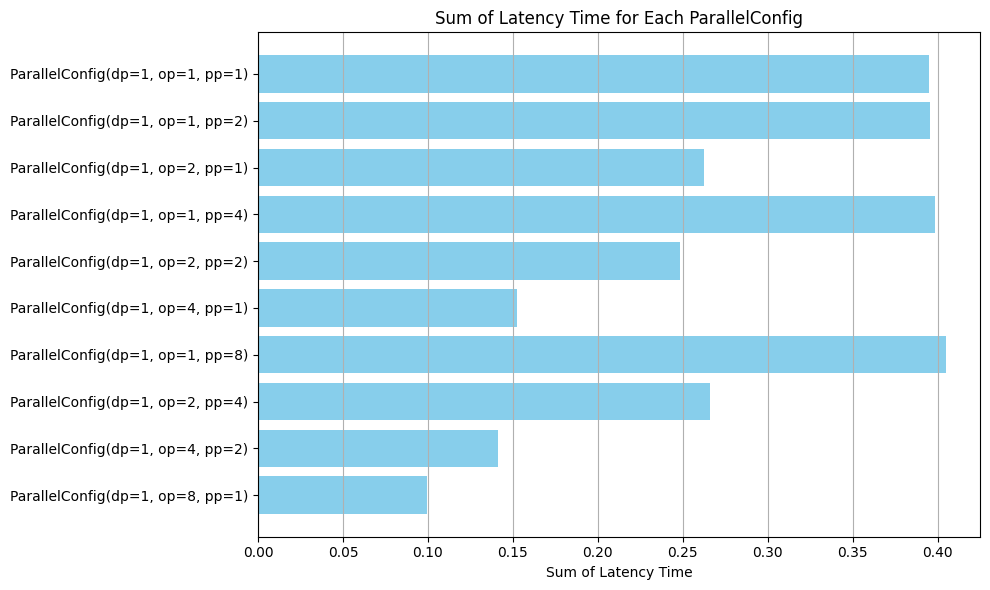

In [46]:
# 对每种ParallelConfig的latent_time求和可视化
parallel_configs = []
latency_sums = []
for parallel_config, perf in model_result.para_dict.items():
    print(str(parallel_config), sum(perf.latency[1]))
    parallel_configs.append(str(parallel_config))
    latency_sums.append(sum(perf.latency[1]))
# 可视化
# 提取并计算延迟时间
import matplotlib.pyplot as plt
# 可视化
plt.figure(figsize=(10, 6))
plt.barh(parallel_configs, latency_sums, color='skyblue')
plt.xlabel('Sum of Latency Time')
plt.title('Sum of Latency Time for Each ParallelConfig')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

ParallelConfig(dp=1, op=8, pp=1) 1.5998501777648926
ParallelConfig(dp=1, op=4, pp=2) 6.866626739501953
ParallelConfig(dp=1, op=2, pp=4) 7.715435028076172
ParallelConfig(dp=1, op=1, pp=8) 12.788440704345703
ParallelConfig(dp=1, op=4, pp=1) 3.1982202529907227
ParallelConfig(dp=1, op=2, pp=2) 8.840564727783203
ParallelConfig(dp=1, op=1, pp=4) 12.788440704345703
ParallelConfig(dp=1, op=2, pp=1) 6.394960403442383
ParallelConfig(dp=1, op=1, pp=2) 12.788440704345703
ParallelConfig(dp=1, op=1, pp=1) 12.788440704345703


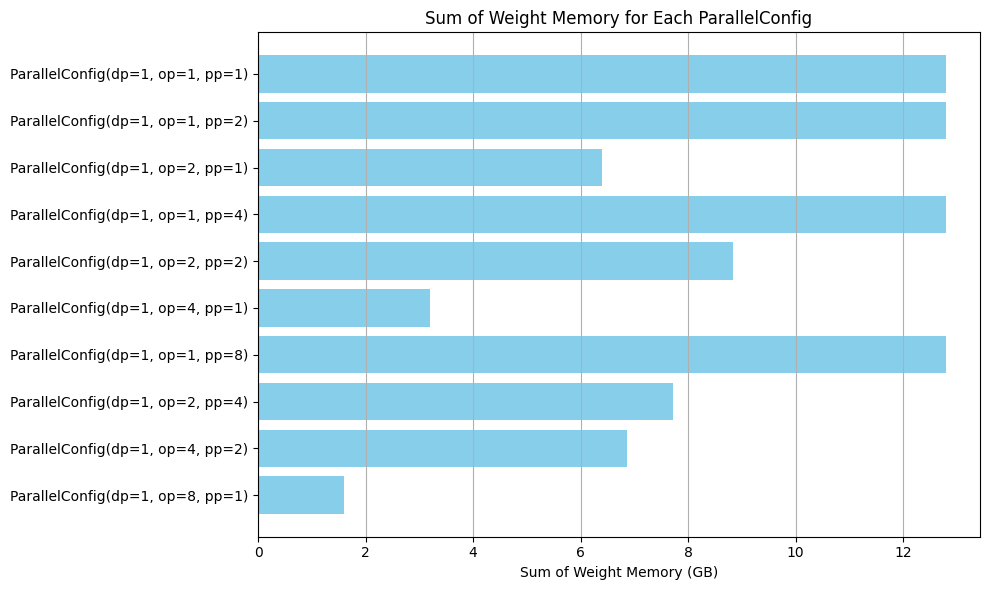

In [47]:
from alpa_serve.util import GB
# 对每种ParallelConfig的latent_time求和可视化
parallel_configs = []
weight_mem_sums = []
for parallel_config, perf in model_result.para_dict.items():
    print(str(parallel_config), sum(perf.weight_mem) / GB)
    parallel_configs.append(str(parallel_config))
    weight_mem_sums.append(sum(perf.weight_mem) / GB)

# 提取并计算延迟时间
import matplotlib.pyplot as plt
# 可视化
plt.figure(figsize=(10, 6))
plt.barh(parallel_configs, weight_mem_sums, color='skyblue')
plt.xlabel('Sum of Weight Memory (GB)')
plt.title('Sum of Weight Memory for Each ParallelConfig')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [64]:
# 获得"bert-6.7b", "moe-5.3b", "bert-2.6b", "moe-2.4b", "bert-1.3b", "moe-1.3b"的memory和latency
from alpa_serve.profiling import ParallelConfig
# model_names = ["bert-6.7b", "moe-5.3b", "bert-2.6b", "moe-2.4b", "bert-1.3b", "moe-1.3b"]
model_names = ["bert-2.6b", "bert-1.3b", "moe-1.3b", "bert-6.7b", "moe-5.3b", "bert-2.6b", "moe-2.4b", "bert-1.3b", "moe-1.3b"]
pc = ParallelConfig(dp=1, op=1, pp=4)

model_mems = []
for model_name in model_names:
    model_result = syn_prof_database.results[model_name]
    perf = sum(model_result.para_dict[pc].weight_mem) + max(model_result.para_dict[pc].act_mem[1])
    model_mems.append(perf / GB)
    print(model_name, perf / GB)

bert-2.6b 5.969506502151489
bert-1.3b 3.4252536296844482
moe-1.3b 4.08832049369812
bert-6.7b 13.601073503494263
moe-5.3b 11.586594820022583
bert-2.6b 5.969506502151489
moe-2.4b 6.044776678085327
bert-1.3b 3.4252536296844482
moe-1.3b 4.08832049369812


In [65]:
sum(model_mems)

58.19860625267029

In [66]:
13 * 4

52

In [73]:
import numpy as np
model_weight_mem = np.zeros((2, 2, 3))
model_weight_mem[1][1][:2] = [2, 4]
model_weight_mem

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [2., 4., 0.]]])